# Análisis de datos con Pyhon - ENTREGA FINAL
Nombre y apellido: Jose Carlos Peralta

# Etapa 1

## Script básico
Actividades 2 y 3

In [134]:
# Lista de diccionarios con productos de una mueblería
ventas = [
    {'producto': 'Silla de madera', 'precio': 15000, 'cantidad': 30},
    {'producto': 'Mesa de comedor', 'precio': 100000, 'cantidad': 10},
    {'producto': 'Sofá de 3 plazas', 'precio': 850000, 'cantidad': 5},
    {'producto': 'Cama matrimonial', 'precio': 600000, 'cantidad': 8},
    {'producto': 'Escritorio', 'precio': 180000, 'cantidad': 12},
    {'producto': 'Lámpara de pie', 'precio': 75000, 'cantidad': 20},
    {'producto': 'Estantería', 'precio': 120000.00, 'cantidad': 15},
    {'producto': 'Cómoda', 'precio': 300000.00, 'cantidad': 6},
    {'producto': 'Silla de oficina', 'precio': 150000.00, 'cantidad': 25},
    {'producto': 'Mesa auxiliar', 'precio': 90000.00, 'cantidad': 18}
]


In [135]:
# Calculamos el total de ventas de todos los productos
ventas_totales = sum([item['precio'] * item['cantidad'] for item in ventas])

# Mostramos los resultados
for item in ventas:
    total_producto = item['precio'] * item['cantidad']
    print(f"{item['producto']}: $ {total_producto:,.2f}")

print("\n=================================")
print(f" Total de ventas mensuales: ${ventas_totales:,.2f}")
print("=================================")


Silla de madera: $ 450,000.00
Mesa de comedor: $ 1,000,000.00
Sofá de 3 plazas: $ 4,250,000.00
Cama matrimonial: $ 4,800,000.00
Escritorio: $ 2,160,000.00
Lámpara de pie: $ 1,500,000.00
Estantería: $ 1,800,000.00
Cómoda: $ 1,800,000.00
Silla de oficina: $ 3,750,000.00
Mesa auxiliar: $ 1,620,000.00

 Total de ventas mensuales: $23,130,000.00


## Import Datasets
Actividad 1

In [136]:
import pandas as pd

In [137]:
# Importo clientes
url = "https://raw.githubusercontent.com/josecarlosperalta/Peralta-Jose-Carlos-Comision-252613-Data-Analytics/refs/heads/main/datasets/clientes.csv"
df_clientes = pd.read_csv(url)
df_clientes.head(3)


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


In [138]:
# Importo marketing
url = "https://raw.githubusercontent.com/josecarlosperalta/Peralta-Jose-Carlos-Comision-252613-Data-Analytics/refs/heads/main/datasets/marketing.csv"
df_marketing = pd.read_csv(url)
df_marketing.head(3)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


In [139]:
# Importo ventas
url = "https://raw.githubusercontent.com/josecarlosperalta/Peralta-Jose-Carlos-Comision-252813-Data-Analytics/refs/heads/main/datasets/ventas.csv"
df_ventas = pd.read_csv(url)
df_ventas.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


## Dataframe ventas

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [140]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [141]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [142]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
937,1516,Secadora,$105.80,3.0,14/04/2024,Electrodomésticos
1897,1725,Lavadora,$38.16,6.0,08/08/2024,Electrodomésticos
2535,2529,Proyector,$92.21,4.0,29/10/2024,Electrónica
1154,1748,Cafetera,$61.63,3.0,07/05/2024,Electrodomésticos
580,1513,Microondas,$69.57,1.0,09/03/2024,Electrodomésticos


In [143]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1946,$76.58
2009,$88.01
2521,$54.79
2840,$39.35
1311,$96.20


In [144]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
2626,3.0
365,5.0
716,3.0
1316,5.0
2836,11.0


In [145]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
2985,24/12/2024
562,07/03/2024
876,07/04/2024
173,21/01/2024
2654,14/11/2024


In [146]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


In [147]:
df_ventas["categoria"].unique()

array(['Decoración', 'Electrodomésticos', 'Electrónica'], dtype=object)

### Calidad de datos
Actividad 5

In [148]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [149]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="producto")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
833,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
857,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
868,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
...,...,...,...,...,...,...
854,2108,SmartWatch,$79.37,10.0,06/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
825,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
877,2373,Smartphone,$123.60,12.0,07/04/2024,Electrónica


In [150]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [151]:
# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [152]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
df_ventas["producto"].value_counts()
# df_ventas["producto"].unique()


,count
producto,
Lámpara de mesa,181
Auriculares,147
Microondas,135
Cafetera,118
Laptop,104
Secadora,103
Jarrón decorativo,102
Smartphone,102
Alfombra,102


### Observaciones




* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [153]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [154]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [155]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
2,5.54
67,4.69
74,4.52
46,4.94
52,7.16


In [156]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
69,13/10/2024
65,28/09/2024
54,22/08/2024
5,01/04/2024
41,25/07/2024


In [157]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
61,26/10/2024
75,20/11/2024
43,29/09/2024
12,28/05/2024
74,08/12/2024


### Calidad de los datos


In [158]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

### Observaciones


•	Cantidad de registros: 90

•	Columnas 6

•	0 duplicados, 0 nulos

•	Campo fecha inicio y fin : ajustar a dtype datetime


## Dataframe clientes

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, info, columns, dtypes, head, tail, sample, unique, value_counts, describe, duplicated, isnull, etc. y documentamos las observaciones:

In [159]:
# Aplicamos info() para familiarizarnos con el dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [160]:
# Visualizamos los primeros registros con head()
df_clientes.head()

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [161]:
#visualizo el tipo de datos
df_clientes.dtypes

,0
id_cliente,int64
nombre,object
edad,int64
ciudad,object
ingresos,float64


### Calidad de los datos

In [162]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [163]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones :

•	Cantidad de registros: 567

•	Columnas 5

•	0 duplicados, 0 nulos

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [164]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [165]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [166]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [167]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [168]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [169]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
2700,59.64
2802,100.43
2982,81.02


In [170]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)
df_ventas["precio"].dtypes

dtype('float64')

In [171]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [172]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [173]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [174]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

### Dataframe marketing

Convertir a datetime fecha_inicio / fecha_fin

In [175]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [176]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [177]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [178]:
# Validamos los cambios en los dtypes de fecha_inicio y fecha_fin
df_marketing[['fecha_inicio','fecha_fin']].dtypes

,0
fecha_inicio,datetime64[ns]
fecha_fin,datetime64[ns]


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [179]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración


In [180]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]

In [181]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [182]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [183]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


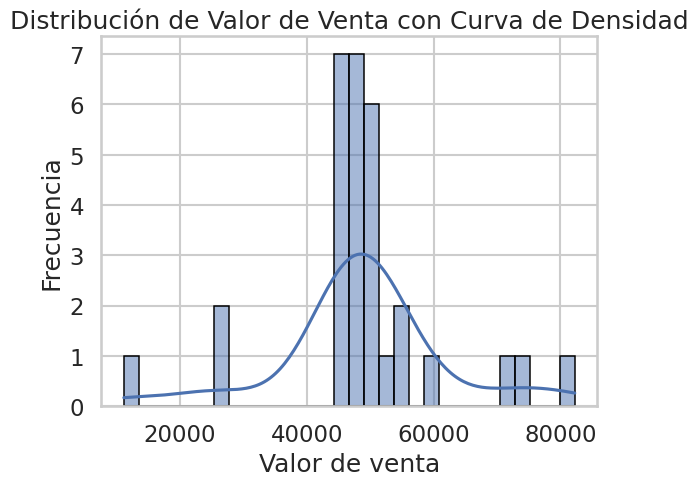

In [184]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [185]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [186]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [246]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta', 'mes', 'nombre_mes'],
      dtype='object')

In [247]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [248]:
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [249]:
# Ordenar y mostrar los resultados
ventas_categoria.sort_values(by="valor_venta", ascending=False )

,categoria,valor_venta
1,Electrodomésticos,505299.63
2,Electrónica,482577.80
0,Decoración,479216.09


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [191]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 187.4+ KB


In [192]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


### Unimos los dataframes ventas con marketing

In [193]:
# Hacemos el merge entre marketing y ventas por columna producto
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
print("Cantidad de registros: ", len(ventas_marketing))

Cantidad de registros:  8994


In [194]:
# Visualizemos algunos registros luego del merge (ordenados por producto, id_venta)
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
4602,10,Adorno de pared,446.50,TV,4.81,2024-06-29,2024-03-20,2024-05-03
4603,10,Adorno de pared,446.50,Email,5.08,2024-06-29,2024-04-13,2024-05-10
4604,10,Adorno de pared,446.50,RRSS,4.16,2024-06-29,2024-10-22,2024-12-21
303,20,Adorno de pared,180.42,TV,4.81,2024-01-14,2024-03-20,2024-05-03
304,20,Adorno de pared,180.42,Email,5.08,2024-01-14,2024-04-13,2024-05-10
305,20,Adorno de pared,180.42,RRSS,4.16,2024-01-14,2024-10-22,2024-12-21


In [195]:
# Visualizamos algunos registros, pero ordenamos por fecha_venta
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["valor_venta"], ascending=False).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
1646,2063,Smartphone,1488.12,TV,4.78,2024-03-05,2024-09-28,2024-10-24
1644,2063,Smartphone,1488.12,RRSS,6.37,2024-03-05,2024-03-29,2024-05-16
1645,2063,Smartphone,1488.12,Email,4.65,2024-03-05,2024-05-28,2024-06-15
2625,1109,Batidora,1485.96,Email,4.48,2024-04-11,2024-04-10,2024-06-08
2627,1109,Batidora,1485.96,RRSS,4.52,2024-04-11,2024-11-01,2024-12-08
2626,1109,Batidora,1485.96,TV,6.28,2024-04-11,2024-08-27,2024-10-11


Luego del merge encontramos:

Aparecen ventas duplicadas, por ejemplo los primeros 3 registros con id_venta 2063, dado que ese producto tuvo 3 campañas de marketing, pero para este caso fue vendido fuera del período de marketing.
Y ver el caso de los últimos 3 registros con id_venta 1109, dos de ellos dentro y uno fuera del período

Por ello, vamos a generar dos nuevos dataframes, uno con aquellas ventas dentro del período de marketing, y otro fuera del período

### Ventas dentro de la campaña

In [196]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña de marketing
ventas_con_marketing = ventas_marketing.query("fecha_venta >= fecha_inicio & fecha_venta <= fecha_fin")
print("Cantidad de registros dentro de la campaña: ", len(ventas_con_marketing))

Cantidad de registros dentro de la campaña:  847


In [197]:
# Visualicemos algunos de los registros de ventas durante la campaña de marketing
ventas_con_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
7937,70,Adorno de pared,1265.04,RRSS,4.16,2024-11-18,2024-10-22,2024-12-21
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
8450,130,Adorno de pared,206.10,RRSS,4.16,2024-12-08,2024-10-22,2024-12-21
7508,190,Adorno de pared,360.80,RRSS,4.16,2024-10-30,2024-10-22,2024-12-21
2160,210,Adorno de pared,286.68,TV,4.81,2024-03-24,2024-03-20,2024-05-03


In [198]:
# Como vemos algunos duplicados, listemos solo esos
ventas_con_marketing_duplicados = ventas_con_marketing[ventas_con_marketing.duplicated(subset="id_venta",keep=False)]
ventas_con_marketing_duplicados[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
3237,220,Adorno de pared,498.24,TV,4.81,2024-05-03,2024-03-20,2024-05-03
3238,220,Adorno de pared,498.24,Email,5.08,2024-05-03,2024-04-13,2024-05-10
2985,320,Adorno de pared,224.28,TV,4.81,2024-04-25,2024-03-20,2024-05-03
2986,320,Adorno de pared,224.28,Email,5.08,2024-04-25,2024-04-13,2024-05-10


Los registros con id_venta duplicados nos impiden agrupar directamente por producto, debemos antes agrupar por [id_venta, producto] quedarnos con el primer valor_venta y hacer la suma de los costos de marketing.
Luego si agrupamos por producto, para saber el monto total de venta para cada uno.

In [199]:
# Entonces grupamos primero por id_venta y producto
# de esa particion, nos quedamos con la primera venta y la suma de los costos de marketing
ventas_con_marketing_agg1 = ventas_con_marketing.groupby(["id_venta","producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first"),
    costo_agg=("costo", "sum")
)

print("Cantidad de registros con id_venta únicos: ", len(ventas_con_marketing_agg1))

Cantidad de registros con id_venta únicos:  768


In [200]:
# Verificamos la consistencia de los montos, ventas y costos de marketing
ventas_con_marketing_agg1[["id_venta","producto", "valor_venta", "costo_agg"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


,id_venta,producto,valor_venta,costo_agg
20,70,Adorno de pared,1265.04,4.16
30,100,Adorno de pared,897.28,9.89
39,130,Adorno de pared,206.10,4.16
56,190,Adorno de pared,360.80,4.16
61,210,Adorno de pared,286.68,4.81
64,220,Adorno de pared,498.24,9.89


In [201]:
# En la segunda agregacion, agrupamos solo por producto,
ventas_con_marketing_agg2 = ventas_con_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_cm=("valor_venta", "sum"),
    costo_marketing=("costo_agg", "sum")
)

# Agregamos otra columna con la ganancia
ventas_con_marketing_agg2["ganacia_producto_cm"]= ventas_con_marketing_agg2["ventas_producto_cm"]-ventas_con_marketing_agg2["costo_marketing"]

# Finalmente, ordenamos y guardamos en el dataframe final
ventas_con_marketing_final = ventas_con_marketing_agg2.sort_values(by=["ganacia_producto_cm"], ascending=False)

Ventas fuera de la campaña de marketing

In [202]:
# filtramos solo aquellos productos que se hayan vendido fuera de la campaña
ventas_sin_marketing = ventas_marketing.query("(fecha_venta < fecha_inicio) | (fecha_venta > fecha_fin)")
print("Cantidad de registros fuera de la campaña: ", len(ventas_sin_marketing))

Cantidad de registros fuera de la campaña:  8147


In [203]:
# Dataframe resultante
ventas_con_marketing_final.head(5)

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm
4,Batidora,23460.35,227.32,23233.03
9,Cuadro decorativo,19293.71,195.51,19098.20
3,Auriculares,18181.01,212.75,17968.26
21,Parlantes Bluetooth,17942.96,144.45,17798.51
19,Lámpara de mesa,17925.37,235.19,17690.18


In [204]:
ventas_sin_marketing[["id_venta","producto", "valor_venta", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["id_venta","producto"], ascending=True).head(6)

,id_venta,producto,valor_venta,fecha_venta,fecha_inicio,fecha_fin
2794,1,Lámpara de mesa,658.00,2024-04-17,2024-05-30,2024-06-29
2795,1,Lámpara de mesa,658.00,2024-04-17,2024-08-26,2024-10-07
1458,2,Cuadro decorativo,318.36,2024-02-27,2024-04-27,2024-06-04
1459,2,Cuadro decorativo,318.36,2024-02-27,2024-08-15,2024-09-12
1460,2,Cuadro decorativo,318.36,2024-02-27,2024-11-05,2024-12-23
6630,3,Espejo decorativo,51.32,2024-09-22,2024-05-31,2024-07-08


In [205]:
# Aquí también hay id_venta duplicados, así que procedemos igual que antes, agrupando primero por id_venta y producto
# y luego solo por producto
ventas_sin_marketing_agg1 = ventas_sin_marketing.groupby(["id_venta", "producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first")
)
print(len(ventas_sin_marketing_agg1))

ventas_sin_marketing_agg2 = ventas_sin_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_sm=("valor_venta", "sum")
)

# Ordenamos y guardamos en el dataframe final
ventas_sin_marketing_final = ventas_sin_marketing_agg2[["producto", "ventas_producto_sm"]].sort_values(by=["ventas_producto_sm"], ascending=False)

2998


In [206]:
ventas_sin_marketing_final.head(5)

,producto,ventas_producto_sm
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60


Graficamos ventas y costos de marketing apilado

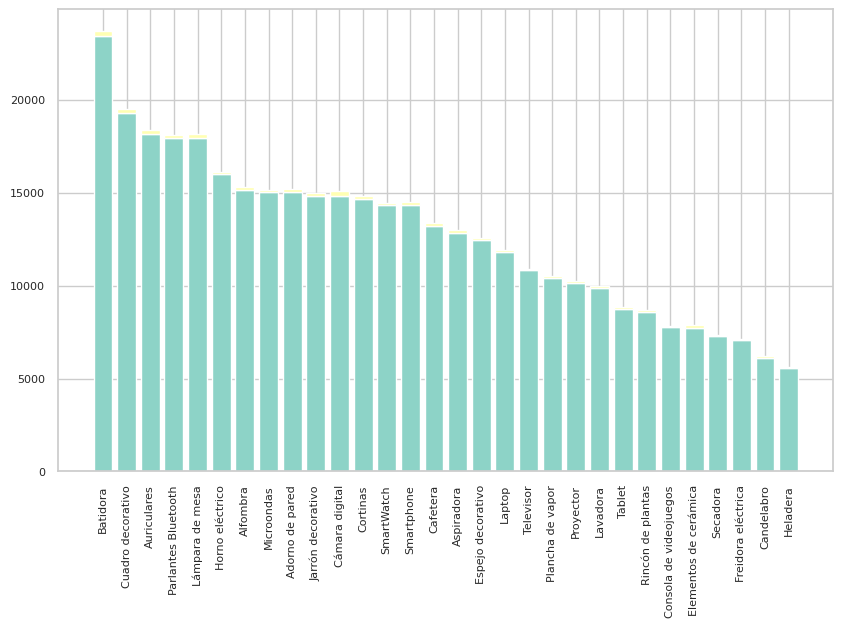

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

# Estilos
sns.set_theme(
    style="whitegrid",
    palette="Set3",
    context="notebook")
plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["ventas_producto_cm"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["costo_marketing"],
        bottom=ventas_con_marketing_final["ventas_producto_cm"],
        label="Costo Marketing")


plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [208]:
# Vemos la cantidad de productos unicos en ventas
df_ventas["producto"].nunique()

30

In [209]:
# Vemos la cantidad de productos unicos en marketing
df_marketing["producto"].nunique()

30

In [210]:
# Listamos los registros de ventas ordenados por producto ascendiente
df_ventas.sort_values(by="producto", ascending=True )

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
1478,410,Adorno de pared,109.64,3,2024-06-21,Decoración,328.92
2428,620,Adorno de pared,92.16,4,2024-10-21,Decoración,368.64
699,780,Adorno de pared,79.13,7,2024-03-21,Decoración,553.91
257,50,Adorno de pared,83.10,5,2024-01-31,Decoración,415.50
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,913.32
...,...,...,...,...,...,...,...
1282,2652,Televisor,74.49,4,2024-05-25,Electrónica,297.96
220,2252,Televisor,89.27,8,2024-01-26,Electrónica,714.16
643,2082,Televisor,55.66,3,2024-03-15,Electrónica,166.98
1668,2991,Televisor,92.33,4,2024-07-15,Electrónica,369.32


In [211]:
# Listamos los registros de marketing ordenados por producto ascendiente
df_marketing.sort_values(by=["producto","canal"])

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10
70,14,Adorno de pared,RRSS,4.16,2024-10-22,2024-12-21
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
84,28,Alfombra,RRSS,5.82,2024-11-27,2025-01-08
...,...,...,...,...,...,...
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
32,72,Tablet,TV,4.90,2024-07-08,2024-09-03
81,59,Televisor,Email,4.19,2024-11-20,2025-01-19
16,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28


In [212]:
# Para evitar duplicados, habria que agrupar marketing antes de hacer el merge (a costa de perder la fecha)
df_marketing_avg = df_marketing.groupby(["producto"], as_index=False)["costo"].mean()
df_marketing_avg

,producto,costo
0,Adorno de pared,4.683333
1,Alfombra,5.820000
2,Aspiradora,5.486667
3,Auriculares,5.080000
4,Batidora,5.093333
5,Cafetera,6.053333
6,Candelabro,4.883333
7,Consola de videojuegos,4.256667
8,Cortinas,5.786667
9,Cuadro decorativo,5.283333


In [213]:
# Unir los datasets ventas y marketing por columna 'producto'
# Aqui tienen dos caminos, unir ventas con df_marketing que tiene duplicados
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
# O, unir ventar con df_marketing_avg que no tiene duplicados, pero no tiene fechas
# ventas_marketing = pd.merge(df_ventas, df_marketing_avg, on="producto", how="inner")

In [214]:
# Verificar coincidencias (muestra)
ventas_marketing.sort_values(by=["producto", "precio"], ascending=True)

# Nota1: si unieron ventas con marketing, obtienen 8994 registros
# Nota2: si unieron ventas con marketing_avg obtienen 2998 registros

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
7608,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,74,TV,4.81,2024-03-20,2024-05-03
7609,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,44,Email,5.08,2024-04-13,2024-05-10
7610,610,Adorno de pared,27.89,8,2024-11-04,Decoración,223.12,14,RRSS,4.16,2024-10-22,2024-12-21
1491,150,Adorno de pared,27.92,5,2024-02-28,Decoración,139.60,74,TV,4.81,2024-03-20,2024-05-03
1492,150,Adorno de pared,27.92,5,2024-02-28,Decoración,139.60,44,Email,5.08,2024-04-13,2024-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...
4246,2552,Televisor,122.59,7,2024-06-11,Electrónica,858.13,59,Email,4.19,2024-11-20,2025-01-19
4247,2552,Televisor,122.59,7,2024-06-11,Electrónica,858.13,89,TV,4.98,2024-12-13,2025-02-08
1578,2572,Televisor,123.48,7,2024-03-02,Electrónica,864.36,29,RRSS,3.96,2024-05-17,2024-06-28
1579,2572,Televisor,123.48,7,2024-03-02,Electrónica,864.36,59,Email,4.19,2024-11-20,2025-01-19


### Analizamos el impacto de la campaña

In [215]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Nota: si trabajan con el datafrane marketing pueden aplicar el filtro,
# si trabajan con dataframe marketing_avg, al no tener fecha, no apliquen el filtro.

ganancias_marketing = ventas_marketing.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")

# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ganancias_marketing = ganancias_marketing[["producto", "valor_venta", "costo"]]
ganancias_marketing.sort_values(by="producto", ascending=True)

,producto,valor_venta,costo
2091,Adorno de pared,553.91,4.81
8645,Adorno de pared,745.52,4.16
2586,Adorno de pared,264.00,4.81
8450,Adorno de pared,206.10,4.16
8318,Adorno de pared,773.08,4.16
...,...,...,...
8666,Televisor,101.58,4.98
8665,Televisor,101.58,4.19
8425,Televisor,597.74,4.19
3684,Televisor,415.80,3.96


In [216]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ganancias_marketing = ganancias_marketing.groupby("producto")[["valor_venta","costo"]].sum()

In [217]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
ganancias_marketing["ganancia_neta"] = ganancias_marketing['valor_venta']-ganancias_marketing['costo']
ganancias_marketing=ganancias_marketing.sort_values(by="ganancia_neta", ascending=False)

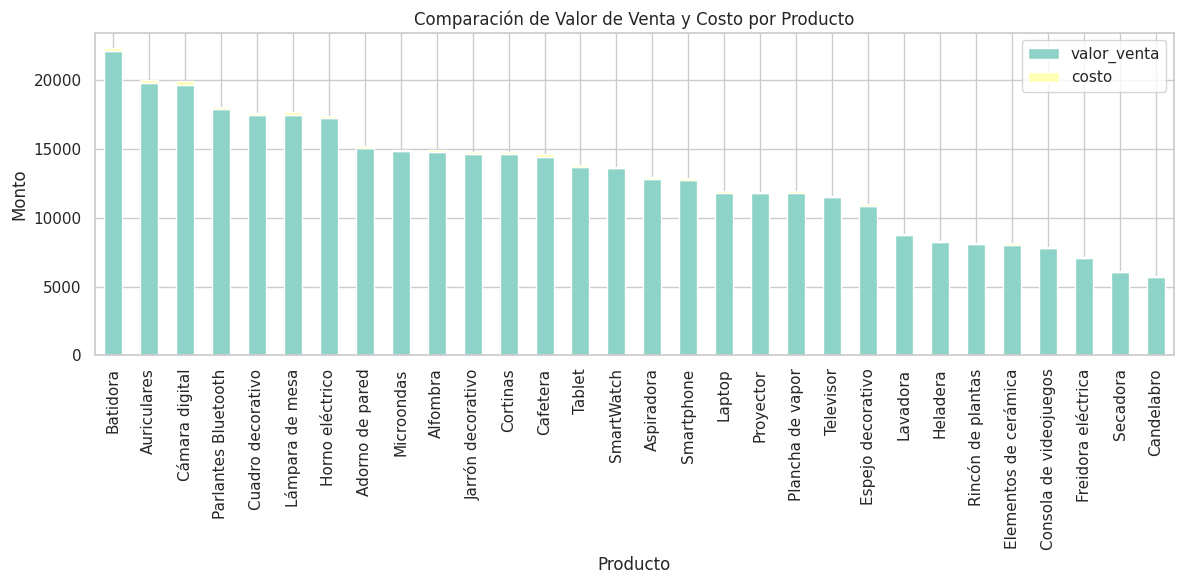

In [218]:
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto
ganancias_marketing[["valor_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Solución al problema de los duplicados

In [219]:
# Hacemos el merge entre marketing y ventas por columna producto
marketing_ventas = pd.merge(df_marketing, df_ventas, on="producto", how="inner")
marketing_ventas.sort_values(by="producto", ascending=True)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,id_venta,precio,cantidad,fecha_venta,categoria,valor_venta
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,630,71.99,9,2024-01-04,Decoración,647.91
907,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,280,29.81,9,2024-09-01,Decoración,268.29
906,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,480,117.68,10,2024-08-28,Decoración,1176.80
905,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,450,79.85,6,2024-08-24,Decoración,479.10
904,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10,230,88.01,1,2024-08-23,Decoración,88.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2782,62.80,8,2024-02-15,Electrónica,502.40
1590,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2122,97.30,9,2024-02-12,Electrónica,875.70
1589,29,Televisor,RRSS,3.96,2024-05-17,2024-06-28,2952,112.58,5,2024-02-11,Electrónica,562.90
8621,89,Televisor,TV,4.98,2024-12-13,2025-02-08,2912,42.72,1,2024-03-26,Electrónica,42.72


In [220]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña
marketing_ventas_pp1 = marketing_ventas.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")

In [221]:
# Calculamos el total_ventas por producto haciendo valor_venta * cantidad
marketing_ventas_pp2 = marketing_ventas_pp1.copy() # para eliminar la advertencia
marketing_ventas_pp2["total_venta"] = (
    marketing_ventas_pp2["valor_venta"] * marketing_ventas_pp2["cantidad"]
)


In [222]:
# Agrupamos el dataframe por producto usando .agg
# Agregar total_venta como el promedio, elimina el impacto de los datos duplicados
# Y seguimos agegando costo como la suma de lo invertido en cada canal
ganancias_marketing = marketing_ventas_pp2.groupby("producto").agg(
    {
        "total_venta": "mean",
        "costo": "sum",
    }
)

In [223]:
# A partir de venta_total y costo, calculamos la ganancia obtenida
ganancias_marketing["ganancia"]= ganancias_marketing["total_venta"]-ganancias_marketing["costo"]
ganancias_marketing = ganancias_marketing.sort_values(by="ganancia", ascending=False)
ganancias_marketing.head(3)

,total_venta,costo,ganancia
producto,,,
Microondas,6164.674783,104.89,6059.784783
Heladera,5786.587143,60.12,5726.467143
Cafetera,5388.738000,160.84,5227.898000


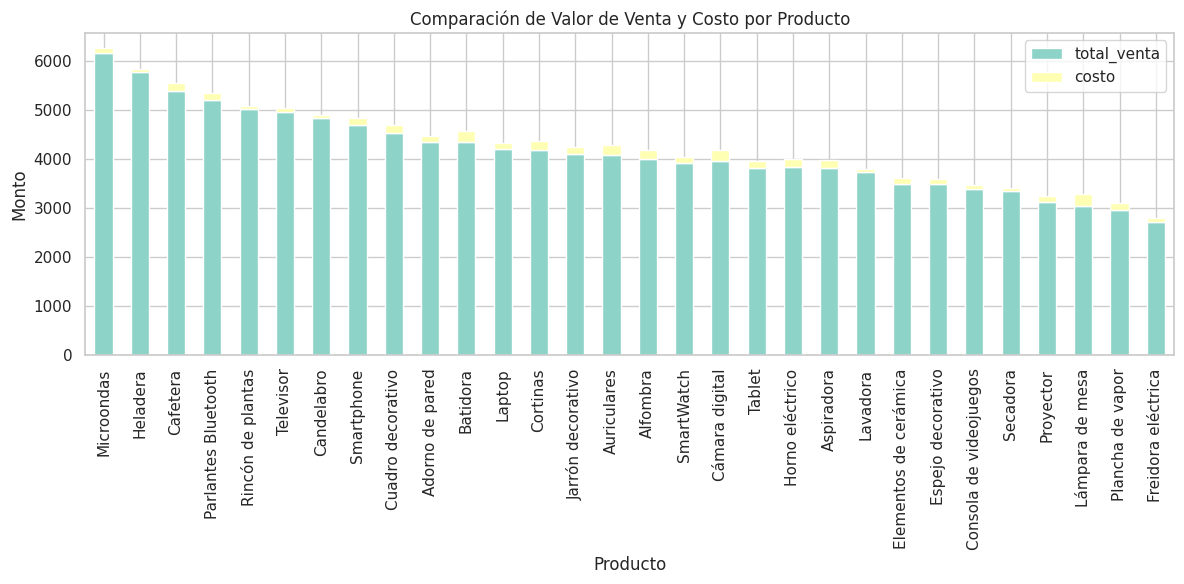

In [224]:
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto
ganancias_marketing[["total_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ahora en el gráfico los costos de campañas de marketing sin más signficativos.

# Entrega Final

# Etapa 3 - Análisis de Datos

Objetivo: Realizar análisis estadístico y exploratorio sobre los datos procesados.
sobre:
* df_ventas
* df_marketing

## 1 - Estadística Descriptiva

Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe

En la Etapa 2 - Limpieza de datos, obtuvimos los dataframes:

* df_ventas
* df_marketing

Usamos el método describe para obtener un resumen de las:
* Medidas de posición
* Medidas de dispersión o variabilidad

In [225]:
# Dataframe ventas
df_ventas[["precio", "cantidad", "valor_venta"]].describe()
# df_ventas.describe()

,precio,cantidad,valor_venta
count,2998.000000,2998.000000,2998.000000
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.000000,1.000000,26.300000
25%,50.030000,3.000000,220.920000
50%,75.205000,7.000000,418.065000
75%,100.067500,9.000000,709.920000
max,124.970000,12.000000,1488.120000


In [226]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [227]:
# Dataframe marketing
df_marketing.groupby("canal")["costo"].describe()

,count,mean,std,min,25%,50%,75%,max
canal,,,,,,,,
Email,30.0,4.840000,0.898773,2.95,4.2125,4.895,5.5075,6.84
RRSS,30.0,5.030333,0.894101,3.16,4.5600,5.130,5.5425,7.16
TV,30.0,4.915667,1.063215,3.06,4.3725,4.795,5.5400,7.39


## 2 - EDA (Análisis Exploratorio de Datos)

Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

### Gráficos histogramas

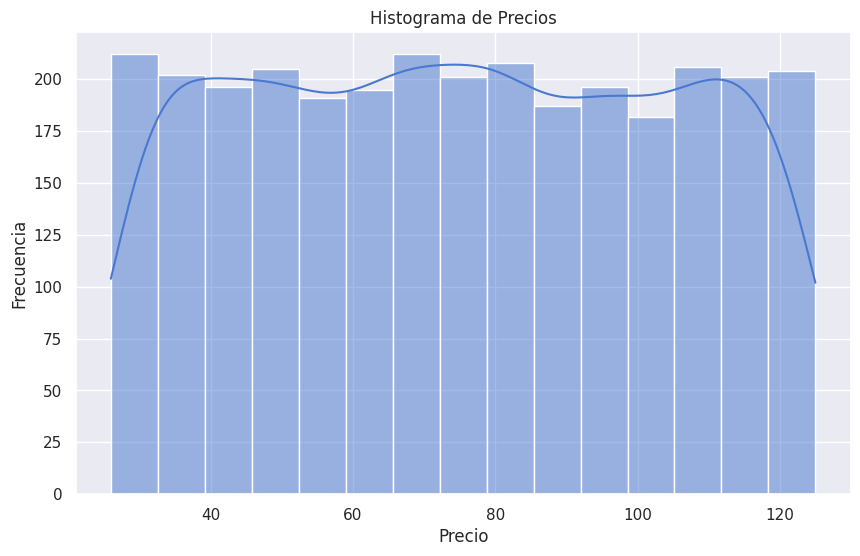

In [228]:
# Histograma de precios

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="muted") # deep, muted, bright, Set1, Set2, Set3 // style="darkgrid"
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="precio", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

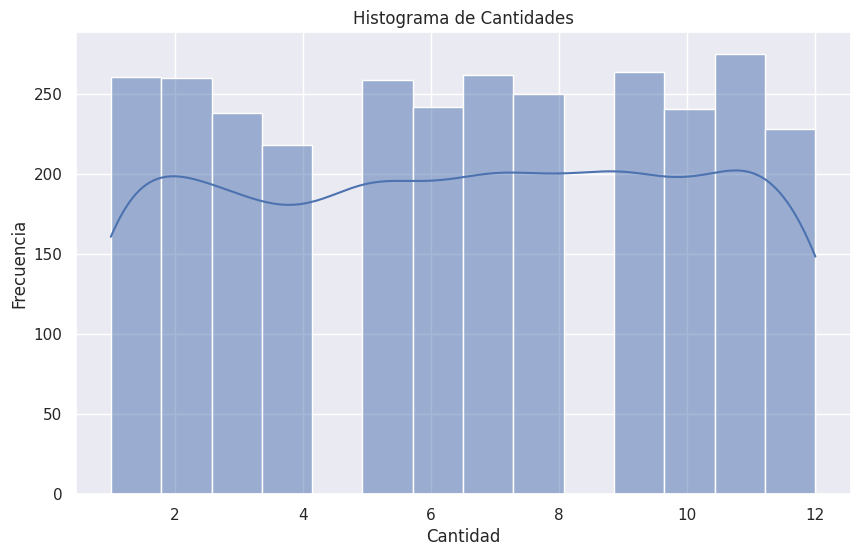

In [229]:
# Histograma cantidades

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="cantidad", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Cantidades")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

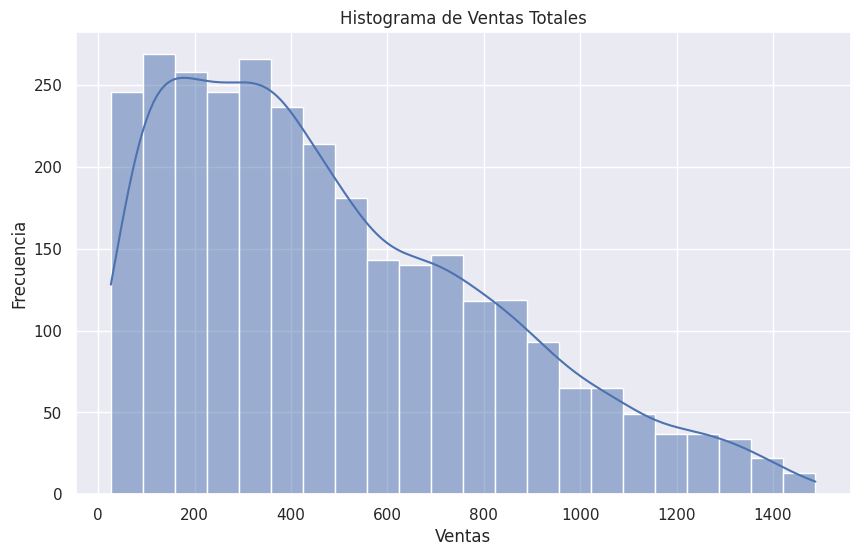

In [230]:
# Histograma ventas_totales

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="valor_venta", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()


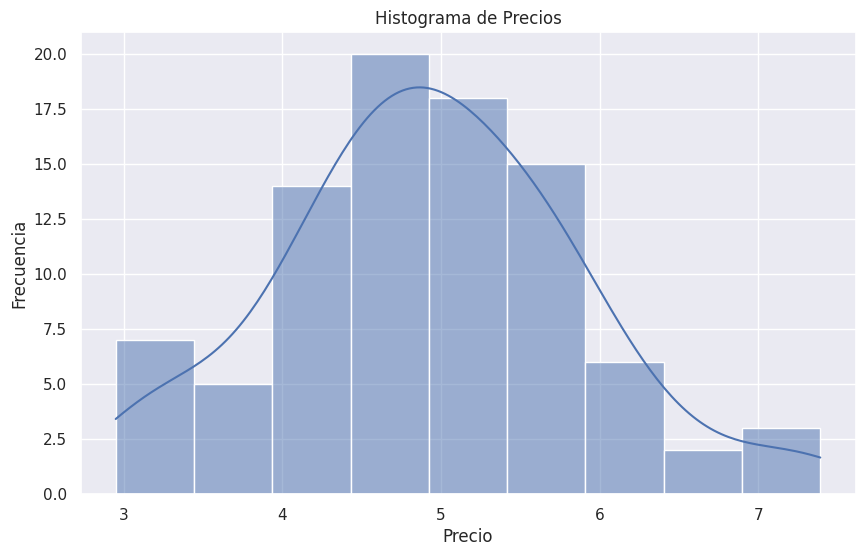

In [231]:
# Histograma costo marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_marketing, x="costo", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

### Gráficos Boxplot

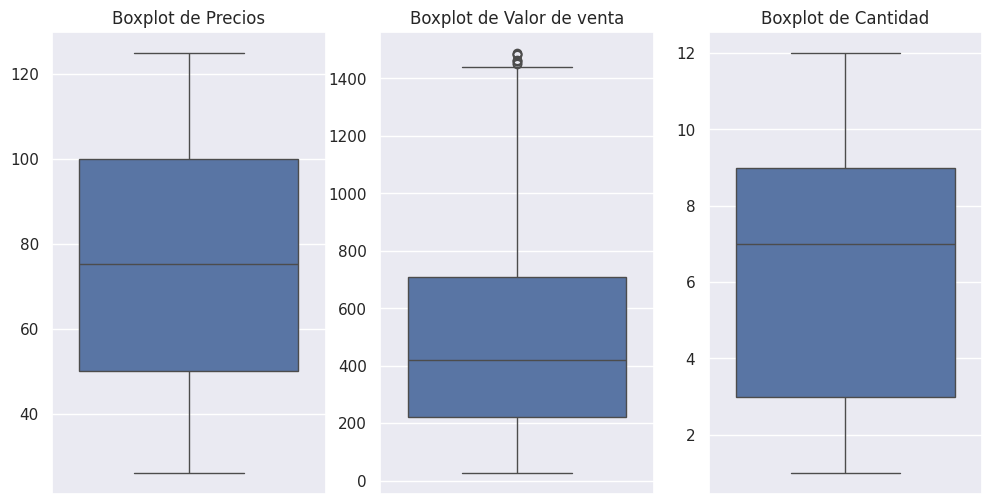

In [232]:
# Boxplot Ventas

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="deep") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6)) #ancho x alto = resolucion
medianprops=dict(linestyle='-', linewidth=2, color='blak')

# Subplots, dividen al lienzo en partes
plt.subplot(1,3,1) # (1,3,1) => (1 fila, 3 columans, bloque 1)

# Subplot 1
sns.boxplot(data=df_ventas, y="precio")
plt.title("Boxplot de Precios")
plt.ylabel("")

# Subplot 2
plt.subplot(1,3,2) # (1,3,2) => (1 fila, 3 columans, bloque 2)
sns.boxplot(data=df_ventas, y="valor_venta")
plt.title("Boxplot de Valor de venta")
plt.ylabel("")


# Subplot 3
plt.subplot(1,3,3) # (1,3,3) => (1 fila, 3 columans, bloque 3)
sns.boxplot(data=df_ventas, y="cantidad")
plt.title("Boxplot de Cantidad")
plt.ylabel("")

plt.show()


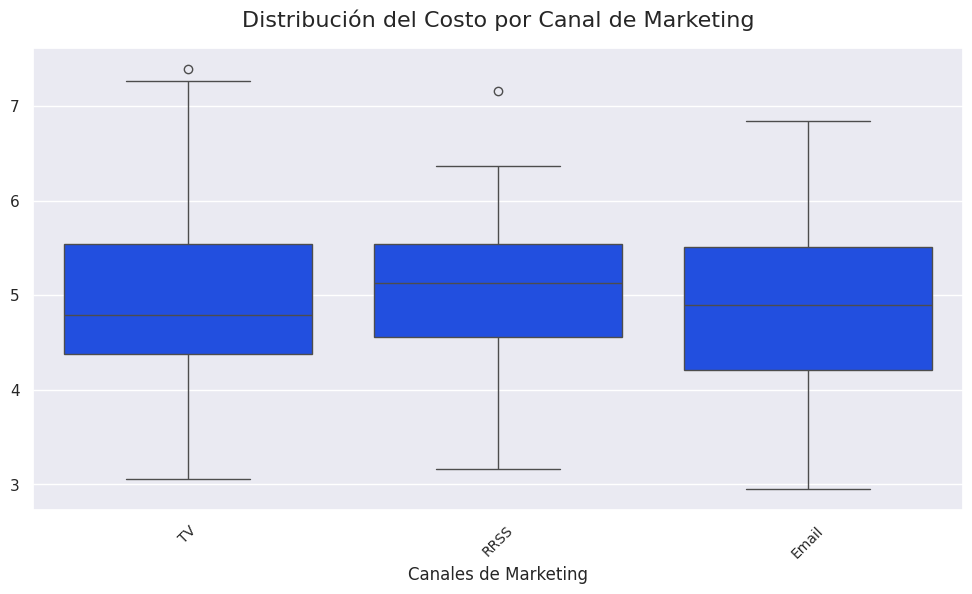

In [233]:
# Boxplot marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="bright") # deep, muted, bright, Set1, Set2, Set3
plt.figure(figsize=(12, 6))

# Graficamos
sns.boxplot(data=df_marketing, x="canal", y="costo")
# sns.boxplot(data=df_marketing, y="costo") # asi grafico costo para todos los canales

# Título y subtítulo
plt.title("Distribución del Costo por Canal de Marketing", fontsize=16, pad=15)

plt.xlabel("Canales de Marketing", fontsize=12)
plt.ylabel("")

# Rotación y tamaño de labels del eje X
plt.xticks(rotation=45, fontsize=10)

plt.show()


## 3 - Correlación

In [234]:
# Primero calculamos la matríz de correlación usando las variables numéricas
correlacion = df_ventas[['precio', 'cantidad', 'valor_venta']].corr() #.corr() calcula la matriz de correlacion
print("\nMatriz de correlación:")
print(correlacion)


Matriz de correlación:
               precio  cantidad  valor_venta
precio       1.000000 -0.002388     0.558846
cantidad    -0.002388  1.000000     0.773009
valor_venta  0.558846  0.773009     1.000000


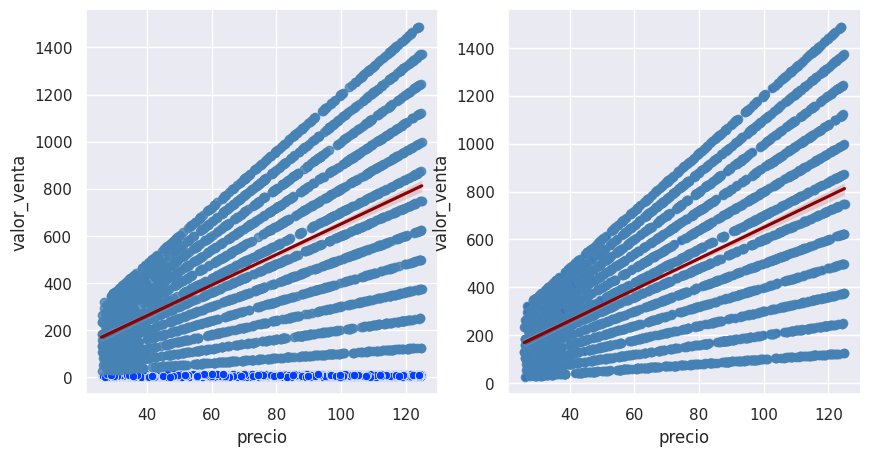

In [235]:
# Representamos las variables en un scatterplot o gráfico de dispersión
# Y agregamos una línea de tendencia

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_ventas, x="precio", y="cantidad")

# agrega una linea de regresion
sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.subplot(1,2,2)
sns.scatterplot(data=df_ventas, x="precio", y="valor_venta")
sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)


plt.show()

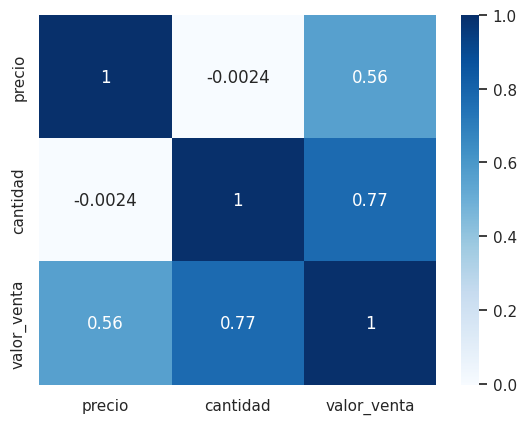

In [236]:
# Creamos un mapa de calor para representar la matríz de correlación
sns.heatmap(correlacion, annot=True, cmap="Blues") # cmap = Blues, Greens, rocket
plt.show()

## 4 - Consolidación de datos

Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.


Aquí intervienen los KPIs, esto es, cuáles son las métricas que le interesan al negocio.
KPIs:

Importe total de ventas concretado por mes
Cantidad de productos totales vendidos por mes
Volumen de venta por categorías
Impacto de la campaña de marketing en las ventas

### Importe total de ventas concretado por mes

In [237]:
# Corramos un head para recordar el dataframe
df_ventas.head(10)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84
5,1697,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,318.15
6,1710,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,130.86
7,2959,Proyector,88.17,9,2024-01-02,Electrónica,793.53
8,318,Rincón de plantas,79.86,11,2024-01-03,Decoración,878.46
9,419,Candelabro,66.11,8,2024-01-03,Decoración,528.88


In [271]:
# Generamos primero la columna mes
df_ventas["mes"] = df_ventas["fecha_venta"].dt.month


# Agrupamos por mes y agregamos por valor_venta
ventas_mes = df_ventas.groupby("nombre_mes", as_index=False).agg(
    ventas_mes=("valor_venta", "sum")
)



# Para asegurar el orden correcto de los meses en el dataframe
orden_mes = [
    'Enero', 'Febrero', 'Marzo', 'Abril',
    'Mayo', 'Junio', 'Julio', 'Agosto',
    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]
ventas_mes['nombre_mes'] = pd.Categorical(ventas_mes['nombre_mes'], categories=orden_mes, ordered=True)
ventas_mes = ventas_mes.sort_values('nombre_mes')


# Visualizamos
ventas_mes.head()

,nombre_mes,ventas_mes
3,Enero,129604.99
4,Febrero,118672.44
7,Marzo,136779.15
0,Abril,128430.69
8,Mayo,143727.25


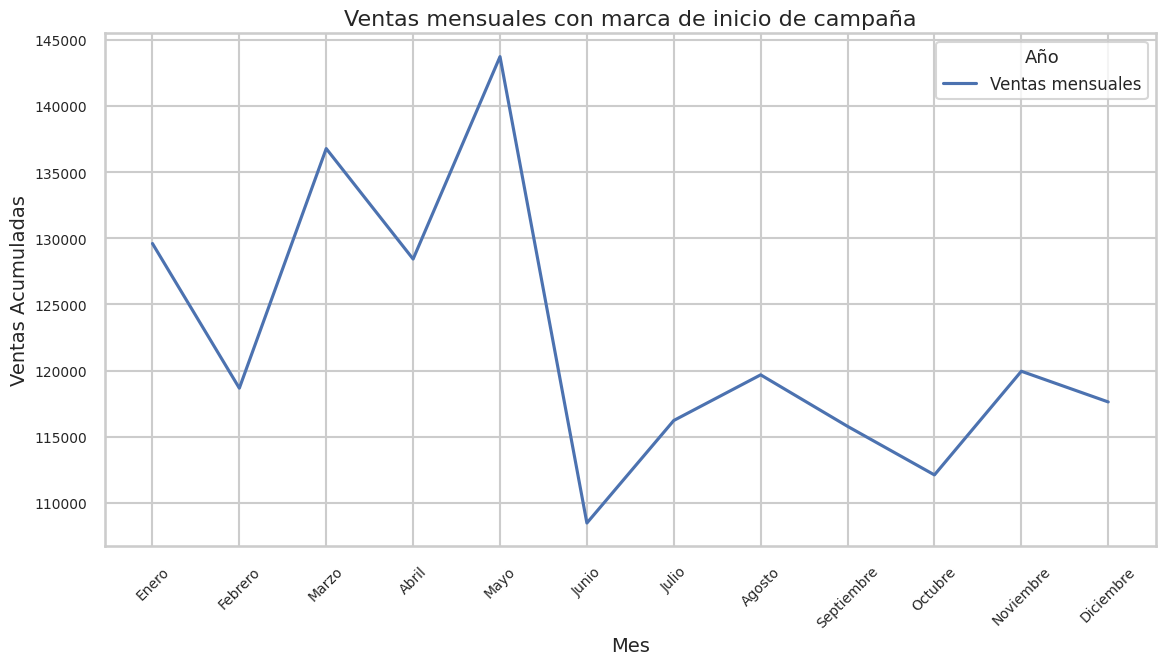

In [272]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Define el orden cronológico de los nombres de los meses para la gráfica.
orden_mes = [
    'Enero', 'Febrero', 'Marzo', 'Abril',
    'Mayo', 'Junio', 'Julio', 'Agosto',
    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Definimos el tamaño del lienzo
plt.figure(figsize=(12,7))

# Graficamos, utilizando el orden de meses definido
sns.lineplot(data=ventas_mes, x="nombre_mes", y="ventas_mes", label="Ventas mensuales")

# Ticks (valores de eje)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ventas Acumuladas', fontsize=14)
plt.legend(title='Año', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

Cantidad de productos totales vendidos por mes

In [240]:
# Agrupamos por mes y agregamos por cantidad
cantidades_mes = df_ventas.groupby("mes", as_index=False).agg(
    cantidad_mes=("cantidad", "sum")
)

# Visualizamos
cantidades_mes.head()

,mes,cantidad_mes
0,1,1741
1,2,1607
2,3,1792
3,4,1715
4,5,1812


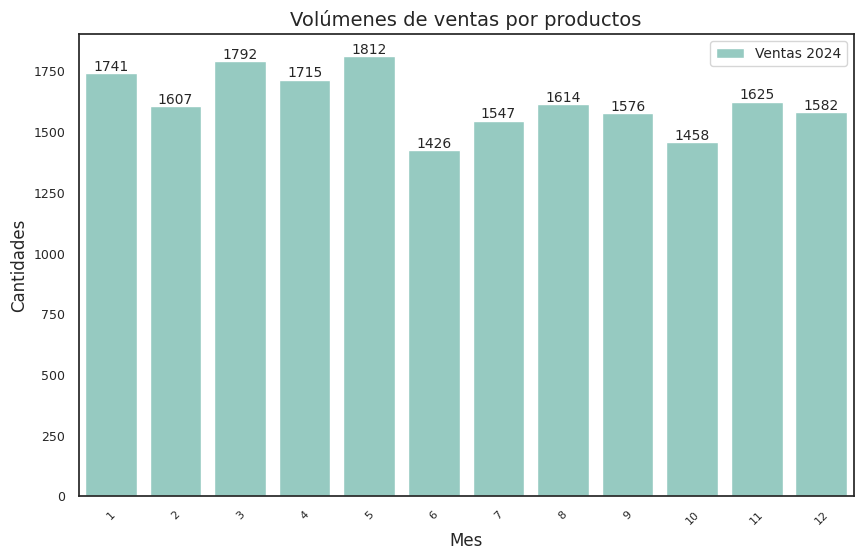

In [241]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="white",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(10,6))

# Crear el barplot
ax = sns.barplot(data=cantidades_mes, x='mes', y='cantidad_mes', label="Ventas 2024", width=0.8)

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(cantidades_mes['cantidad_mes']):
    ax.text(
        i,                       # posición x de la etiqueta
        valor + 10,                   # posición y (ligeramente arriba de la barra)
        str(valor),              # texto
        ha='center', fontsize=10
    )

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', rotation=45,  labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por productos', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidades')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Volumen de venta por categorías

In [242]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,mes,nombre_mes
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,1,Enero
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,1,Enero
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,1,Enero
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,1,Enero
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,1,Enero


In [243]:
# Agrupamos por categoría y agregamos por valor_venta
ventas_categoria = df_ventas.groupby("categoria", as_index=False).agg(
    ventas_totales=("valor_venta", "sum")
)

# Visualizamos
ventas_categoria.head()

,categoria,ventas_totales
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


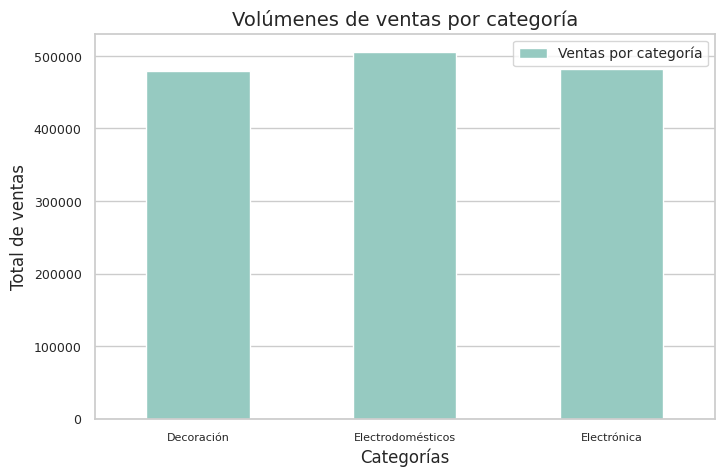

In [244]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos tamaño del lienzo
plt.figure(figsize=(8,5))

# Crear el barplot
ax = sns.barplot(data=ventas_categoria, x='categoria', y='ventas_totales', label="Ventas por categoría", width=0.5)


# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por categoría', fontsize=14)
plt.xlabel('Categorías')
plt.ylabel('Total de ventas')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Impacto de la campaña de marketing en las ventas I

pacto de la campaña de marketing en las ventas I
Trazamos una linea vertical al primer grafico ventas por mes

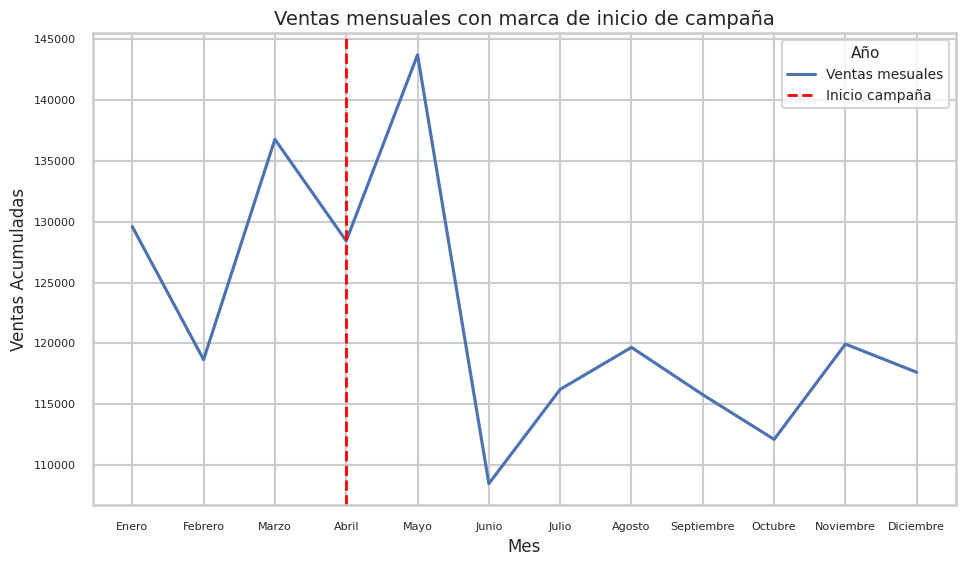

In [275]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="nombre_mes", y="ventas_mes", label="Ventas mesuales" )

# línea vertical que marque el inicio de campaña
plt.axvline(3, color="red", linewidth=2, linestyle="--",
            label="Inicio campaña")

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### Impacto de la campaña de marketing en las ventas II

Revisar la sección Etaoa 2 - Integración de datos Allí, luego de unir los dataframes df_ventas con df_marketing, se generan 2 dataframes independientes, cada uno conteniendo las ventas que se hicieron dentro de algún período de marketing, y otro con las ventas que se realizaron fuera de camapaña.
Así surgen:

ventas_con_marketing_final
ventas_sin_marketing_final

In [276]:
ventas_con_marketing_final.head()

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm
4,Batidora,23460.35,227.32,23233.03
9,Cuadro decorativo,19293.71,195.51,19098.20
3,Auriculares,18181.01,212.75,17968.26
21,Parlantes Bluetooth,17942.96,144.45,17798.51
19,Lámpara de mesa,17925.37,235.19,17690.18


In [277]:
ventas_sin_marketing_final.head()

,producto,ventas_producto_sm
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60


In [278]:
ventas_con_sin_marketing = pd.merge(ventas_con_marketing_final, ventas_sin_marketing_final, on="producto", how="inner")
ventas_con_sin_marketing = ventas_con_sin_marketing.sort_values(by=["ventas_producto_cm"], ascending=False)
ventas_con_sin_marketing.head()

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm,ventas_producto_sm
0,Batidora,23460.35,227.32,23233.03,50979.20
1,Cuadro decorativo,19293.71,195.51,19098.20,54297.60
2,Auriculares,18181.01,212.75,17968.26,74175.58
3,Parlantes Bluetooth,17942.96,144.45,17798.51,47779.46
4,Lámpara de mesa,17925.37,235.19,17690.18,82276.38


In [279]:
# Transformar a formato largo
df_long = ventas_con_sin_marketing[["producto","ventas_producto_cm", "ventas_producto_sm"]]
df_long = df_long.melt(id_vars="producto",
                        var_name="modalidad",
                        value_name="valores")
# df_long = df_long.sort_values(by=["valores", "modalidad"], ascending=True)
df_long.head()

,producto,modalidad,valores
0,Batidora,ventas_producto_cm,23460.35
1,Cuadro decorativo,ventas_producto_cm,19293.71
2,Auriculares,ventas_producto_cm,18181.01
3,Parlantes Bluetooth,ventas_producto_cm,17942.96
4,Lámpara de mesa,ventas_producto_cm,17925.37


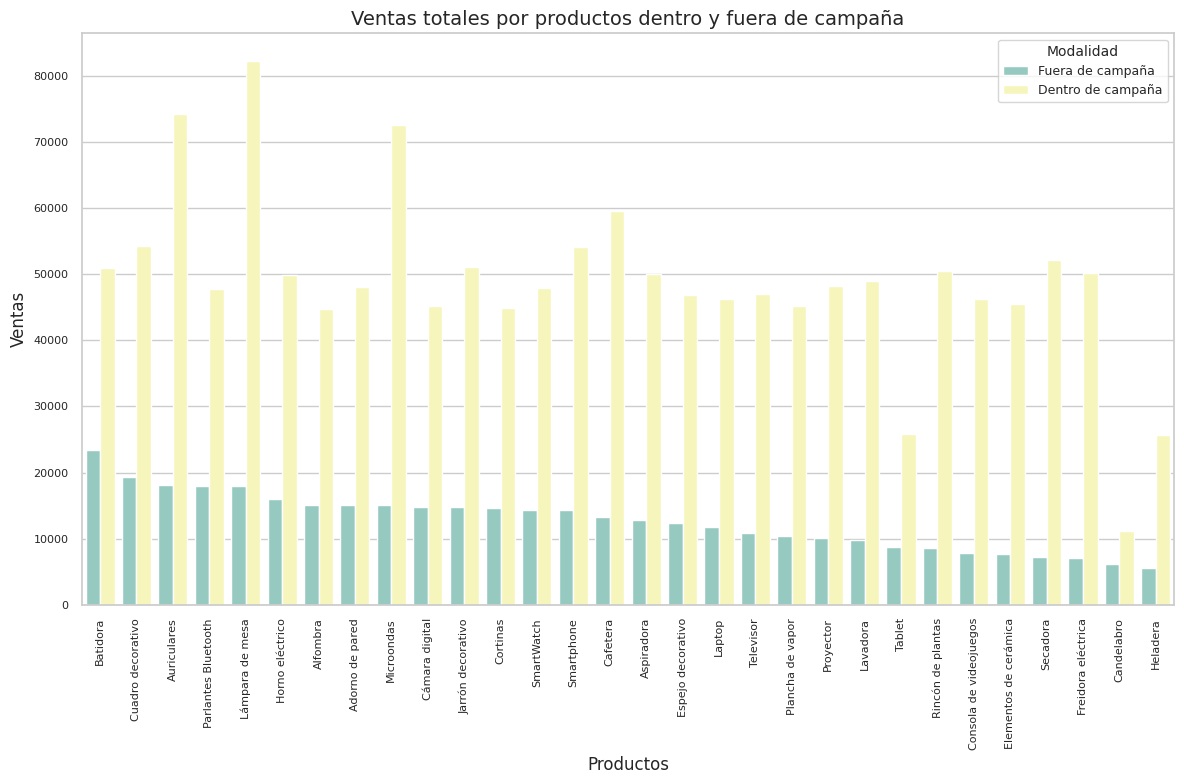

In [283]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(12,8))

# Graficamos
sns.barplot(data=df_long, x="producto", y="valores", hue="modalidad", width=0.8)
# sns.barplot(data=df_long, x="Trimestre", y="Ventas", hue="Producto", width=0.8) Invertimos Productos por Trimestre


# Ticks (valores de eje)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas totales por productos dentro y fuera de campaña', fontsize=14)
plt.xlabel('Productos')
plt.ylabel('Ventas')

# Obtener handles (cuadritos de color) y labels originales del gráfico
handles, labels = plt.gca().get_legend_handles_labels()

# Reemplazar solo los textos de la leyenda, manteniendo colores
plt.legend(
    handles,
    ["Fuera de campaña", "Dentro de campaña"],
    title="Modalidad",
    fontsize=9,
    title_fontsize=10
)
plt.tight_layout()

In [284]:
ventas_marketing.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29


In [285]:
df_test = ventas_marketing.groupby(["id_venta", "producto"]).agg(
    {"valor_venta": "first"})
df_test1 = df_test.groupby("producto").agg(
    {"valor_venta": "sum"})

df_test2 = df_test1.sort_values(by="valor_venta", ascending=False)
df_test2.head()

,valor_venta
producto,
Lámpara de mesa,82276.38
Auriculares,74175.58
Microondas,72562.89
Cafetera,59607.31
Cuadro decorativo,54297.60


### Visualización con Plotly

## Series de tiempo

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [295]:
import plotly.express as px

# Define el orden cronológico de los nombres de los meses.
month_order = [
    'Enero', 'Febrero', 'Marzo', 'Abril',
    'Mayo', 'Junio', 'Julio', 'Agosto',
    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Linea
fig = px.line(
    data_frame=ventas_mes,
    x="nombre_mes",
    y="ventas_mes",
    markers=True,
    category_orders={"nombre_mes": month_order} # Establecer explícitamente el orden
)

fig.update_layout(
    title='Ventas mensuales (línea)',
    title_x=0.5,
    xaxis_title='Mes',
    yaxis_title='Ventas',
    template='plotly_white'
)

fig.show()

## GRAFICO DE LAS VENTAS POR CATEGORIA

In [300]:
import plotly.express as px

# Crear un gráfico de barras con Plotly Express
fig = px.bar(
    data_frame=ventas_categoria,
    x='categoria',
    y='valor_venta',
    color='categoria', # Esta línea asignará un color diferente a cada categoría.
    title='Ventas por Categoría',
    labels={'categoria': 'Categoría', 'valor_venta': 'Total de Ventas'}
)

fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

## VENTAS Y COSTO POR PRODUCTO DE LA CAMPAÑA DE MARKETING

In [301]:
import plotly.graph_objects as go
import plotly.express as px

# Crear y/o reiniciar la figura
fig = go.Figure()

# Elegimos la paleta de colores
colors = px.colors.qualitative.Set3 # "Set1", "Set2", "Set3", "Pastel1", "Pastel2"

# Añadir trazas para 'total_venta' y 'costo'
fig.add_trace(go.Bar(x=ganancias_marketing.index, y=ganancias_marketing['total_venta'], name='Total Venta', marker_color=colors[0]))
fig.add_trace(go.Bar(x=ganancias_marketing.index, y=ganancias_marketing['costo'], name='Costo', marker_color=colors[1]))

fig.update_layout(
    barmode='stack',             # Apilado real
    template='plotly_white',
    title='Total Venta y Costo por Producto',
    title_x=0.5,
    xaxis_title='Producto',
    yaxis_title='Monto'
)

fig.show()

## 4 - Presentación Final

OBSERVACIONES :

1. Histogramas

Cantidad y Precios:
Las distribuciones de cantidad y precio muestran una forma relativamente homogénea, sin concentraciones extremas. Esto sugiere que ambos indicadores presentan variabilidad acotada y una dispersión equilibrada.

Ventas Totales:
El histograma de ventas totales no es uniforme; la distribución es asimétrica hacia la derecha (sesgo a la izquierda), concentrándose mayoritariamente en valores bajos.
La media ($489) es mayor que la mediana ($418), lo cual es consistente con una distribución sesgada positivamente.

2. Marketing

En el histograma de costos de marketing se observa una distribución relativamente homogénea, aunque se destacan campañas cuyo nivel de inversión se encuentra principalmente entre 4 y 6 unidades monetarias.

3. Boxplots

Ventas:
La mediana del boxplot coincide con lo observado en el histograma, ubicándose entre 400 y 600.
Se identifica un outlier en 1400, lo cual indica un caso de venta excepcionalmente alta.

Precios:
La mayor parte de los precios se agrupa alrededor de 80, mostrando poca dispersión.

Cantidad:
El boxplot refleja que los clientes suelen comprar entre 6 y 7 unidades, lo que coincide con una tendencia hacia compras moderadas.

Marketing (por canal):
Los tres canales presentan la misma escala y una mediana cercana a 5.
Las cajas tienen anchos similares, lo que indica una variabilidad comparable entre canales.
Se observan outliers en RRSS y TV, reflejando campañas puntuales con inversión atípicamente alta.

4. Correlaciones

Precio vs Cantidad:
La correlación cercana a 0 confirma que no existe relación lineal entre el precio y la cantidad vendida.

Cantidad vs Venta Total:
Se observa una correlación positiva significativa (0.77), lo que indica que a mayor cantidad vendida, mayor es el valor total de ventas, como es esperable en este tipo de datos.

5. Serie de Tiempo y Análisis Temporal

Ventas por Mes:
La mayor venta se registró en mayo, mientras que junio obtuvo el valor más bajo.

Cantidad por Mes (barras):
Mayo también presenta la mayor cantidad de unidades vendidas.
En junio se vendió prácticamente la misma cantidad, pero a menor precio, lo que explica la caída del valor total de ventas.

6. Categorías

En el gráfico de ventas por categoría, se observa que los niveles son similares entre sí, sin diferencias marcadas entre categorías.

7. Impacto del Marketing

A partir de la serie temporal se aprecia que la campaña de marketing inicia en el mes 3, lo que permite analizar su efecto comparando períodos pre y post campaña.

Finalmente, el gráfico comparativo de ventas totales dentro y fuera de campaña permite evaluar el impacto directo del marketing en el comportamiento de las ventas.



##Conclusión General

Las distribuciones, correlaciones y análisis temporales muestran un comportamiento coherente entre las variables:

las ventas están fuertemente impulsadas por la cantidad,

el precio no influye directamente sobre la cantidad,

existe un efecto temporal claro en mayo,

y se observan patrones razonables de inversión en marketing con presencia de outliers en algunos canales.